<a href="https://colab.research.google.com/github/pbcong/catvsdog/blob/main/model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile


In [ ]:
import tensorflow as tf
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, Dense, Conv2D, MaxPooling2D, Flatten

In [ ]:
!unzip /content/data/cat.zip -d /content/data/cat

Archive:  /content/data/cat.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/data/cat.zip or
        /content/data/cat.zip.zip, and cannot find /content/data/cat.zip.ZIP, period.


In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
import cv2
import imghdr

In [ ]:
image_exts=['jpg', 'jpeg', 'png', 'bmp']

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/data')

Found 3919 files belonging to 2 classes.


In [ ]:
len(data)

123

In [ ]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

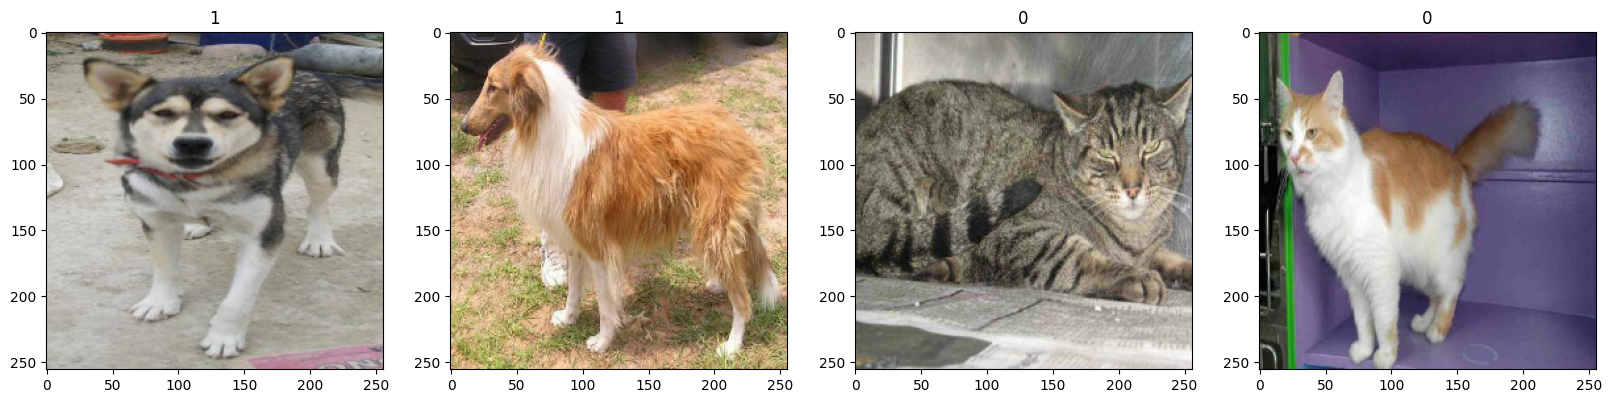

In [ ]:
#0: cats
#1: dogs
fix, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate (batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map (lambda x, y: (x/255, y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].max()

1.0

In [ ]:
train_size=86
val_size=37

In [ ]:
train = data.take(train_size)
val=data.take(val_size)

In [ ]:
 model = Sequential([
     Conv2D (16, (3, 3), 1, activation = 'relu', input_shape=(256, 256, 3)),
     MaxPooling2D(),
     Conv2D (32, (3, 3), 1, activation = 'relu'),
     MaxPooling2D(),
     Conv2D (16, (3, 3), 1, activation = 'relu', input_shape=(256, 256, 3)),
     MaxPooling2D(),
     Flatten(),
     Dense (256, activation = 'relu'),
     Dense (1, activation='sigmoid')
 ])

In [ ]:
model.compile (
    optimizer='adam',
    loss = tf.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)
early_stopping=EarlyStopping (
    min_delta=0.001,
    patience=3,
    restore_best_weights=True
)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [ ]:
history=model.fit (
    train,
    epochs=100,
    validation_data=val,
    callbacks=[early_stopping]
)

Epoch 1/100
86/86 [==============================] - 10s 84ms/step - loss: 0.7433 - accuracy: 0.5400 - val_loss: 0.6825 - val_accuracy: 0.5752
Epoch 2/100
86/86 [==============================] - 9s 104ms/step - loss: 0.6701 - accuracy: 0.5941 - val_loss: 0.6244 - val_accuracy: 0.6816
Epoch 3/100
86/86 [==============================] - 7s 76ms/step - loss: 0.6225 - accuracy: 0.6577 - val_loss: 0.5862 - val_accuracy: 0.7188
Epoch 4/100
86/86 [==============================] - 9s 102ms/step - loss: 0.5431 - accuracy: 0.7304 - val_loss: 0.5059 - val_accuracy: 0.7703
Epoch 5/100
86/86 [==============================] - 7s 80ms/step - loss: 0.4666 - accuracy: 0.7693 - val_loss: 0.4274 - val_accuracy: 0.8285
Epoch 6/100
86/86 [==============================] - 7s 75ms/step - loss: 0.3825 - accuracy: 0.8336 - val_loss: 0.4777 - val_accuracy: 0.7618
Epoch 7/100
86/86 [==============================] - 9s 99ms/step - loss: 0.3255 - accuracy: 0.8634 - val_loss: 0.3122 - val_accuracy: 0.8682
Epo

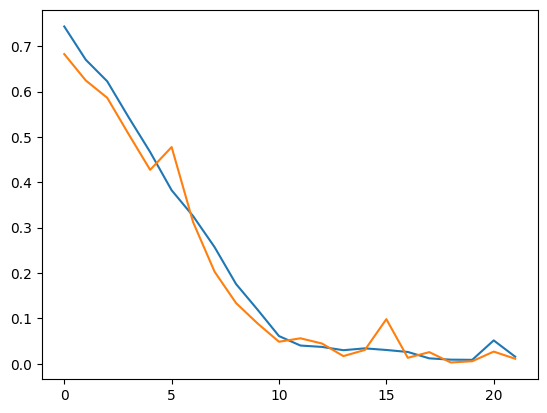

In [ ]:
plt.plot (history.history['loss'])
plt.plot (history.history['val_loss'])

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model.save('/content/drive/MyDrive/models/catvsdog.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
